Магазин e-commerce вводит новый дизайн на сайте.

**Цель**: Определить с помощью А/B тестирования, какой дизайн эффективнее

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ab_test = pd.read_csv('/content/drive/MyDrive/homeworks/ab_test.csv')
countries = pd.read_csv('/content/drive/MyDrive/homeworks/countries_ab.csv')

data = pd.merge(ab_test, countries, on='id')

data.head()

,id,time,con_treat,page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


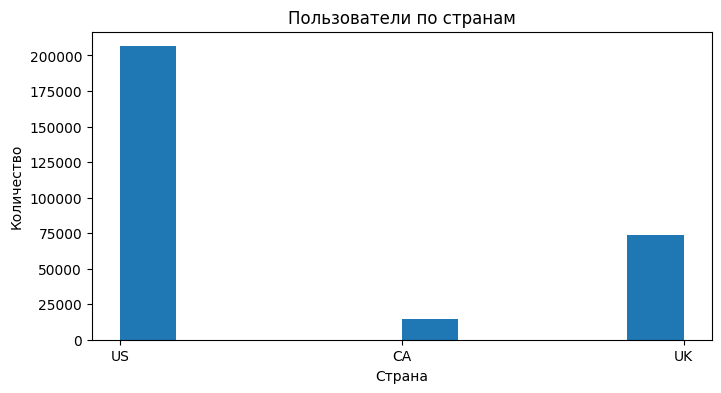

In [21]:
plt.figure(figsize=(8,4))
plt.hist(data['country'])
plt.title('Пользователи по странам')
plt.xlabel('Страна')
plt.ylabel('Количество')
for i, country in enumerate(data['country'].unique()):
    count = data[data['country'] == country]['id'].count()
plt.show()

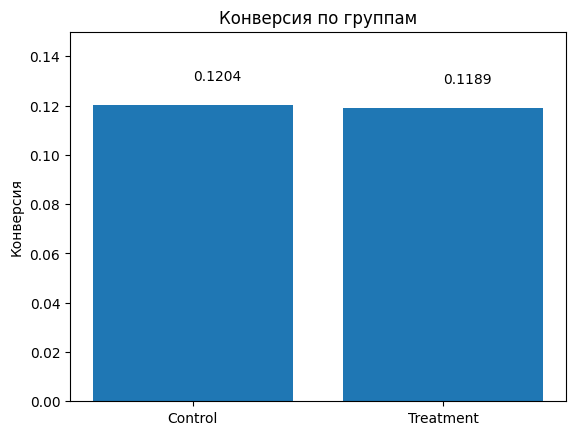

In [22]:
control_rate = data[data['con_treat']=='control']['converted'].mean()
treatment_rate = data[data['con_treat']=='treatment']['converted'].mean()

plt.bar(['Control', 'Treatment'], [control_rate, treatment_rate])
plt.title('Конверсия по группам')
plt.ylabel('Конверсия')
plt.ylim(0, 0.15)
plt.text(0, control_rate + 0.01, f'{control_rate:.4f}')
plt.text(1, treatment_rate + 0.01, f'{treatment_rate:.4f}')
plt.show()

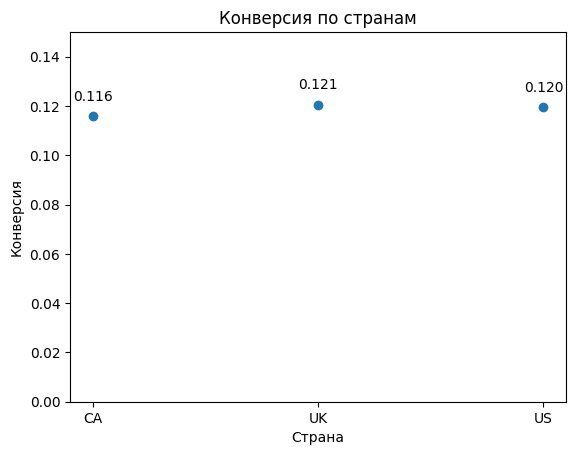

In [23]:
country_data = data.groupby('country')['converted'].mean().reset_index()

plt.scatter(country_data['country'], country_data['converted'])
plt.title('Конверсия по странам')
plt.xlabel('Страна')
plt.ylabel('Конверсия')
plt.ylim(0, 0.15)
for i, row in country_data.iterrows():
    plt.text(row['country'], row['converted'] + 0.005, f'{row["converted"]:.3f}', ha='center', va='bottom')
plt.show()

In [24]:
control = data[data['page'] == 'old_page']
treatment = data[data['page'] == 'new_page']

for country in data['country'].unique():
    country_control = control[control['country'] == country]['converted']
    country_treatment = treatment[treatment['country'] == country]['converted']

    control_rate = country_control.mean()
    treatment_rate = country_treatment.mean()

    p_value = stats.ttest_ind(country_control, country_treatment)[1]

    print(f'Страна: {country}')
    print(f'Группа 1: {control_rate:.4f}')
    print(f'Группа 2: {treatment_rate:.4f}')
    print(f'P-value: {p_value:.4f}')
    if p_value < 0.05:
        print('Статистически значимое различие')
    else:
        print('Статистически незначимое различие')

Страна: US
Группа 1: 0.1208
Группа 2: 0.1184
P-value: 0.0971
Статистически незначимое различие
Страна: CA
Группа 1: 0.1193
Группа 2: 0.1125
P-value: 0.1946
Статистически незначимое различие
Страна: UK
Группа 1: 0.1198
Группа 2: 0.1213
P-value: 0.5365
Статистически незначимое различие


США: Коэффициент конверсии в контрольной группе составляет 0,1208, что означает, что 12,08% пользователей, увидевших старую страницу, перешли на нее. Коэффициент конверсии в экспериментальной группе - 0,1184, т.е. 11,84% пользователей, увидевших новую страницу, перешли на нее. Значение p-value составляет 0,0971, что не меньше 0,05 (обычный уровень значимости), и это говорит о том, что разница в коэффициентах конверсии не является статистически значимой. Таким образом, мы не можем сделать вывод о том, что новая страница более эффективна, чем старая, для пользователей в США.

CA: Коэффициент конверсии в контрольной группе составляет 0,1193, что означает, что 11,93% пользователей, увидевших старую страницу, перешли на нее. Коэффициент конверсии в экспериментальной группе составляет 0,1125, т.е. 11,25% пользователей, увидевших новую страницу, перешли на нее. Значение p-value составляет 0,1946, что не менее 0,05, и указывает на то, что разница в коэффициентах конверсии не является статистически значимой. Таким образом, мы не можем сделать вывод о том, что новая страница более эффективна, чем старая, для пользователей в Канаде.

ВЕЛИКОБРИТАНИЯ: Контрольный коэффициент конверсии в контрольной группе составляет 0,1198, что означает, что 11,98% пользователей, увидевших старую страницу, перешли на нее. Коэффициент конверсии в экспериментальной группе составляет 0,1213, что означает, что 12,13% пользователей, увидевших новую страницу, перешли на нее. Значение p-value составляет 0,5365, что не менее 0,05, и указывает на то, что разница в коэффициентах конверсии не является статистически значимой. Таким образом, мы не можем сделать вывод о том, что новая страница более эффективна, чем старая, для пользователей в Великобритании.



